# Some EDA on coefs and fitting errors for the 18-factor NMF pattern

In [2]:
import numpy as np
import sklearn
from nmf_with_missing_values import nmf_with_missing_values
import matplotlib.pyplot as plt

## load the data

In [2]:
tmp = np.load('../data/mouse_brain_ISH_float32.npz')
data = tmp['data']
sections = tmp['sections']
original_shape = data.shape
d = data.shape[1] * data.shape[2] * data.shape[3]
data = np.reshape(data, (data.shape[0], d))

## load the NMF result 

In [3]:
f = np.load('../code/reza/nmf_result_ncomp_18.npz')
PPs = f['A']
original_shape = f['original_shape']
X_guess = f['X_guess']
coefs = f['D']

## The number of zeros in coefs

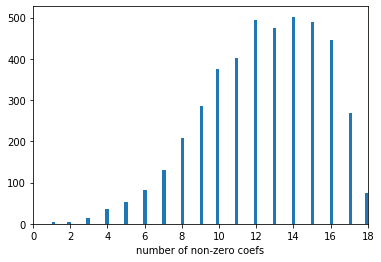

In [25]:
plt.hist(np.sum(coefs > 0, 1), bins=100)
plt.xlim([0, 18])
plt.xlabel('number of non-zero coefs')
plt.show()

## Distribution of entropy of coefs

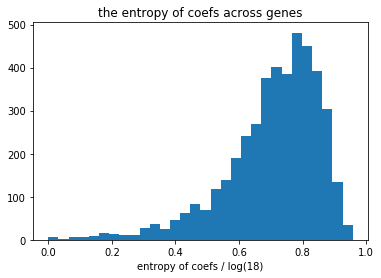

In [27]:
normalized = coefs / np.sum(coefs, 1, keepdims=True)
entropy = np.sum(-(np.log(normalized + 1e-15)) / np.log(18) * normalized, 1)
plt.hist(entropy, 30)
plt.title('the entropy of coefs across genes')
plt.xlabel('entropy of coefs / log(18)')
plt.show()

## The distribution of RMSE

In [39]:
rmse = np.mean((coefs @ PPs - X_guess)**2, 1) / np.mean(X_guess**2, 1)

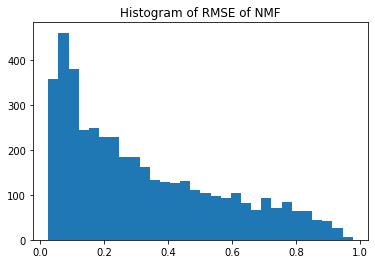

In [41]:
plt.hist(rmse, 30)
plt.title('Histogram of RMSE of NMF')
plt.show()

In [50]:
np.mean((coefs @ PPs - X_guess)**2) / np.mean(X_guess**2)

0.08803085789690523

## joint density of RMSE and the entropy of the coefs

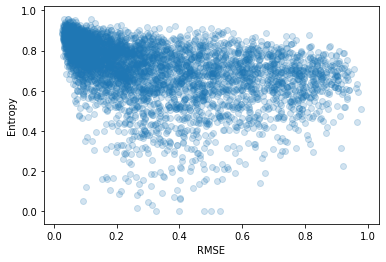

In [46]:
plt.scatter(x = rmse, y = entropy, alpha=.2)
plt.xlabel('RMSE')
plt.ylabel('Entropy')
plt.show()

## Observation: the genes with small coef entropy has RMSE between 0.2 and 0.6.